### Phys 629: Statistical Tools for Physics Research
***Anuradha Gupta***

# Homework 4
### Due: Friday, Sep 22 at 11:59 pm CT

## Problem 1

This one is on correlation coefficients. We want to find the link between the price of a 500 ml bottle of water and the distance from the city center. We might expect to find that the price of a bottle of water decreases as the distance from the city center increases. Higher property rents close to the city center should be reflected in higher prices in the shops.

The hypothesis might be written like this:
"The price of a water bottle decreases as distance from the city center increases."

The more objective scientific research method is always to assume that no such price-distance relationship exists (i.e., there is no correlation) and to express the null hypothesis as:
"There is no significant relationship between the price of a water bottle and distance from the city center."

The data are given in the table below. Compute the Pearson's, Spearman's, and Kendall's correlation coefficients and find the significance level by which the null hypothesis is rejected. Show all your calculation and work using python and Markdown. 

| Distance (m)| price ($) |
|-------- | ------- |
| 50  | 1.80    |
| 175 | 1.20    |
| 270 | 2.00    |
| 375 | 1.50    |
| 425 | 0.80    |
| 580 | 0.60    |
| 710 | 1.05    |
| 790 | 0.85    |
| 890 | 0.90    |
| 980 | 1.00    |
| 1000| 0.95    |

In [29]:
# Introducing the proper libraries
import numpy as np
from scipy import stats

# Defining the data arrays
distance = np.array([50, 175, 270, 375, 425, 580, 710, 790, 890, 980, 1000]) #In meters
price= np.array([1.80, 1.20, 2.00, 1.50, 0.80, 0.60, 1.05, 0.85, 0.90, 1.00, 0.95]) # In dollars

# Calculating necessary information
#mu_distance = np.average(distance)
#mu_price = np.average(price)

#for i in distance:
    
    #r = np.sum((distance[i]-mu_distance)(price[i]-mu_price))/np.sqrt((np.sum(distance[i]-mu_distance)**2)*(np.sum(price[i]-mu_price)))
#    pearson_p = (distance[i]-mu_distance)*(price[i]-mu_price))/(np.sqrt((distance[i]-mu_distance)**2)*(price[i]-mu_price)**2)
#print (r)

###Disregard above, apparently scipy.stats has built in functions that do this in one line. I'm just leaving it in for posterity.

# Pearson's Correlation Coefficient
p = stats.pearsonr(distance, price)

# Spearman Correlation Coefficient
rho = stats.spearmanr(distance, price)

# Kendall's Correlation Coefficient
tau = stats.kendalltau(distance, price)

print("Pearson's results give: p =", p[0])
print("Spearman's results give: rho =", rho[0])
print("Kendall's results give: tau =", tau[0]) 

print("\nThe above results show the correlation coefficient for each method.")

Pearson's results give: p = -0.6493719424695605
Spearman's results give: rho = -0.5545454545454546
Kendall's results give: tau = -0.34545454545454546

The above results show the correlation coefficient for each method.


In [33]:
# Hypothesis vs Null 
print("To compare the validity of the hypothesis vs the null, we need to compare the p-values of each method.\n If the value is > 0.05, we say it is significant.\n")

print("Pearson's results give: p =", p[1])
print("Spearman's results give: rho =", rho[1])
print("Kendall's results give: tau =", tau[1]) 

print("\nPearson's results is significant and we can reject the null. \nFor Spearman's and Kendall's, the results indicate that there is no correlation and so we can't reject the null.")

To compare the validity of the hypothesis vs the null, we need to compare the p-values of each method.
 If the value is > 0.05, we say it is significant.

Pearson's results give: p = 0.030600513361477802
Spearman's results give: rho = 0.07665233333978251
Kendall's results give: tau = 0.16457331248997917

Pearson's results is significant and we can reject the null. 
For Spearman's and Kendall's, the results indicate that there is no correlation and so we can't reject the null.


## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=145$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 145? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

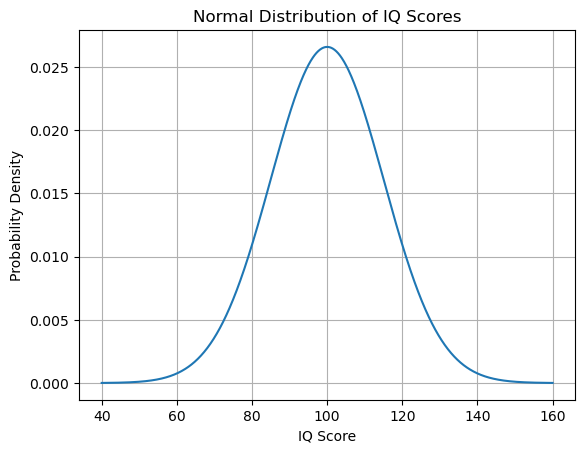

10 Random Draws: [116.2818101   89.85155317 111.8934817  110.72639948 117.26835043
  87.86563146 116.55019806  95.31040786 106.59218704 112.82725805]

The PDF of x @ x=145 is 0.0002954565607958672


In [3]:
#1
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

mu, sigma = 100, 15
distN = stats.norm(loc=mu, scale=sigma)


# Plotting the distribution
xgrid = np.linspace(40, 160, 1000) #mu - 3*sigma, mu + 3*sigma, 
plt.plot(xgrid,distN.pdf(xgrid))
plt.xlabel('IQ Score')
plt.ylabel('Probability Density')
plt.title('Normal Distribution of IQ Scores')
plt.grid()
plt.show()

# 10 random draws
print('10 Random Draws:', distN.rvs(10))

# Print pdf at x = 145
x = 145
print(f'\nThe PDF of x @ x={x} is {distN.pdf(x)}')

Text(0.5, 1.0, 'IQ vs Probability CDF')

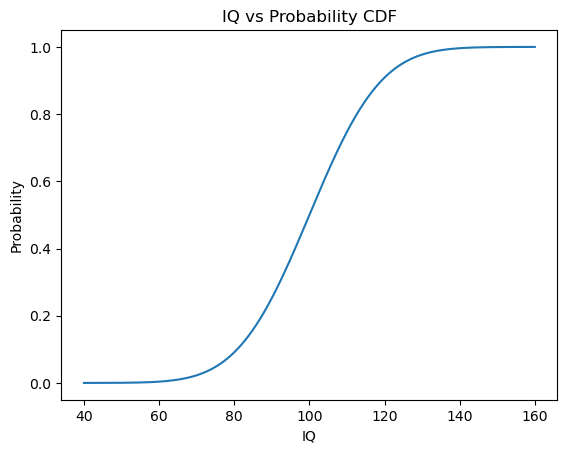

In [5]:
#2
plt.plot(xgrid, distN.cdf(xgrid))
plt.xlabel('IQ')
plt.ylabel('Probability')
plt.title('IQ vs Probability CDF')

In [7]:
#2 (Continuted)
N = 10**4
rand_samp = distN.ppf(np.random.rand(N))

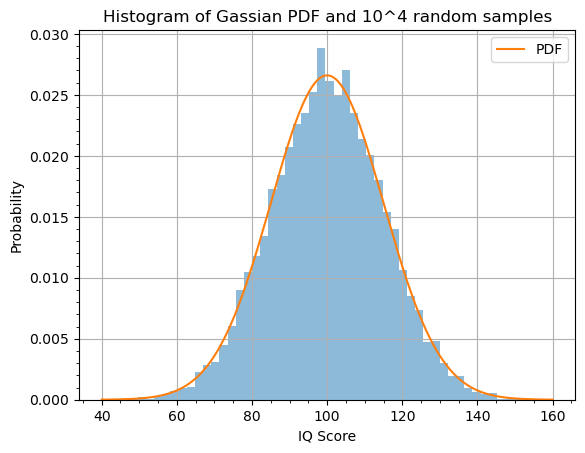

In [8]:
plt.hist(rand_samp, bins = 50, density=True, alpha=0.5)
plt.plot(xgrid,distN.pdf(xgrid),label='PDF')
plt.xlabel('IQ Score')
plt.ylabel('Probability')
plt.title('Histogram of Gassian PDF and 10^4 random samples')
plt.grid()
plt.legend()
plt.minorticks_on()

In [9]:
#3.

#What fraction of people have an IQ above 145? Let's subtract 1-CDF(145) to find out.
cdf_145 = distN.cdf(145)
x_grtr_145 = 1 - cdf_145
print(f'The percent of people with an IQ above 145 are {x_grtr_145}')

The percent of people with an IQ above 145 are 0.0013498980316301035


In [11]:
#4
# What IQ value corresponds to a 1/10^6? Need ppf of 0.999999

one_p_million = distN.ppf(0.999999)
print(f'The IQ that corresponds to 1 in a million is: {one_p_million}')

The IQ that corresponds to 1 in a million is: 171.3013646322563
